# Validation on Preprocessing Data Intake

Runs basic statistics and checks on the preprocessed data from `preprocessing.py`.

In [1]:
import torch
import matplotlib.pyplot as plt

## Read Data

In [2]:
train_tensors = torch.load('./data/train_tensors.pt', weights_only=True)
test_tensors = torch.load('./data/test_tensors.pt', weights_only=True)
train_tensors_noise = torch.load('./data/train_tensors_noise.pt', weights_only=True)
test_tensors_noise = torch.load('./data/test_tensors_noise.pt', weights_only=True)

In [3]:
train_loader = torch.utils.data.DataLoader(train_tensors, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_tensors, batch_size=32, shuffle=True)
train_noise_loader = torch.utils.data.DataLoader(train_tensors_noise, batch_size=32, shuffle=True)
test_noise_loader = torch.utils.data.DataLoader(test_tensors_noise, batch_size=32, shuffle=True)

## Return Dataset Lengths

In [4]:
train_length = len(train_loader.dataset)
test_length = len(test_loader.dataset)
train_noise_length = len(train_noise_loader.dataset)
test_noise_length = len(test_noise_loader.dataset)

print(f'train: {train_length}, test: {test_length}, train w/ noise: {train_noise_length}, test w/ noise: {test_noise_length}')

train: 8000, test: 2000, train w/ noise: 8800, test w/ noise: 2200


## Display Sample Images

In [5]:
def show_image(loader) -> None:
    '''
    Take torch dataloader and output the first image

    Parameters
    ----------
    loader : torch.utils.data.DataLoader
        dataloader for model development
    
    Returns
    -------
    None
    '''
    loader_iter = iter(loader)
    images, labels = next(loader_iter)

    image_tensor = images[0]
    print('image tensor:\n', image_tensor)

    image = image_tensor.permute(1, 2, 0).numpy()

    plt.imshow(image)
    plt.axis('off')
    plt.show()


image tensor:
 tensor([[[0.0784, 0.0745, 0.0784,  ..., 0.0627, 0.0667, 0.0667],
         [0.0745, 0.0745, 0.0745,  ..., 0.0667, 0.0627, 0.0627],
         [0.0745, 0.0745, 0.0745,  ..., 0.0588, 0.0549, 0.0549],
         ...,
         [0.0471, 0.0510, 0.0549,  ..., 0.0196, 0.0196, 0.0196],
         [0.0510, 0.0510, 0.0549,  ..., 0.0235, 0.0275, 0.0235],
         [0.0510, 0.0510, 0.0510,  ..., 0.0157, 0.0196, 0.0157]],

        [[0.1373, 0.1333, 0.1373,  ..., 0.1412, 0.1451, 0.1451],
         [0.1333, 0.1333, 0.1333,  ..., 0.1412, 0.1373, 0.1373],
         [0.1333, 0.1333, 0.1333,  ..., 0.1294, 0.1255, 0.1216],
         ...,
         [0.1529, 0.1569, 0.1608,  ..., 0.0549, 0.0549, 0.0549],
         [0.1490, 0.1529, 0.1569,  ..., 0.0588, 0.0627, 0.0588],
         [0.1569, 0.1569, 0.1569,  ..., 0.0510, 0.0549, 0.0510]],

        [[0.2000, 0.1961, 0.2000,  ..., 0.1961, 0.2000, 0.2000],
         [0.1961, 0.1961, 0.1961,  ..., 0.1961, 0.1961, 0.1922],
         [0.1961, 0.1961, 0.1961,  ..., 0.1

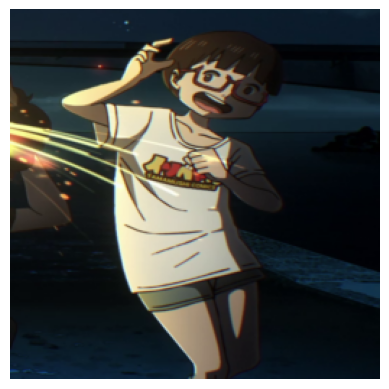

In [6]:
show_image(train_loader)

image tensor:
 tensor([[[0.4588, 0.4588, 0.4588,  ..., 0.3098, 0.3098, 0.3098],
         [0.4706, 0.4706, 0.4706,  ..., 0.3098, 0.3098, 0.3098],
         [0.4824, 0.4824, 0.4824,  ..., 0.3020, 0.3020, 0.3020],
         ...,
         [0.4353, 0.4275, 0.4275,  ..., 0.1098, 0.1490, 0.1804],
         [0.5569, 0.5490, 0.5529,  ..., 0.0980, 0.1216, 0.1490],
         [0.6157, 0.6157, 0.6157,  ..., 0.0980, 0.0980, 0.0902]],

        [[0.3804, 0.3765, 0.3765,  ..., 0.2471, 0.2471, 0.2471],
         [0.3882, 0.3882, 0.3882,  ..., 0.2471, 0.2471, 0.2471],
         [0.4000, 0.4000, 0.4000,  ..., 0.2392, 0.2392, 0.2392],
         ...,
         [0.2706, 0.2627, 0.2627,  ..., 0.0824, 0.1333, 0.1490],
         [0.4000, 0.3922, 0.3922,  ..., 0.0667, 0.0902, 0.1216],
         [0.4863, 0.4824, 0.4824,  ..., 0.0588, 0.0510, 0.0588]],

        [[0.3647, 0.3647, 0.3647,  ..., 0.2235, 0.2235, 0.2235],
         [0.3765, 0.3804, 0.3804,  ..., 0.2235, 0.2235, 0.2235],
         [0.3882, 0.3922, 0.3922,  ..., 0.2

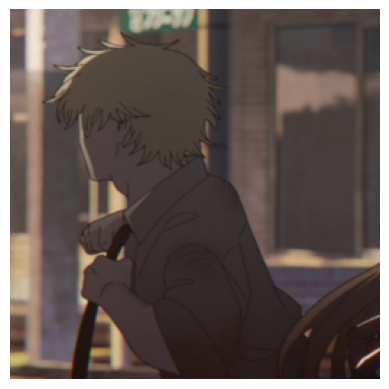

In [7]:
show_image(test_loader)

image tensor:
 tensor([[[0.1176, 0.1216, 0.1216,  ..., 0.8627, 0.8471, 0.8392],
         [0.1176, 0.1216, 0.1216,  ..., 0.8706, 0.8549, 0.8471],
         [0.1176, 0.1176, 0.1176,  ..., 0.8784, 0.8667, 0.8627],
         ...,
         [0.0784, 0.0863, 0.0863,  ..., 0.0471, 0.0392, 0.0353],
         [0.1059, 0.1137, 0.1098,  ..., 0.0510, 0.0392, 0.0353],
         [0.0667, 0.0549, 0.0549,  ..., 0.0549, 0.0431, 0.0353]],

        [[0.2353, 0.2392, 0.2392,  ..., 0.4980, 0.4902, 0.4863],
         [0.2392, 0.2392, 0.2392,  ..., 0.5059, 0.5020, 0.4941],
         [0.2392, 0.2392, 0.2392,  ..., 0.5137, 0.5098, 0.5059],
         ...,
         [0.1020, 0.1137, 0.1137,  ..., 0.0627, 0.0471, 0.0353],
         [0.1412, 0.1529, 0.1333,  ..., 0.0667, 0.0510, 0.0353],
         [0.0863, 0.0745, 0.0588,  ..., 0.0667, 0.0510, 0.0353]],

        [[0.4314, 0.4353, 0.4353,  ..., 0.9451, 0.9373, 0.9294],
         [0.4314, 0.4314, 0.4314,  ..., 0.9529, 0.9451, 0.9373],
         [0.4235, 0.4235, 0.4235,  ..., 0.9

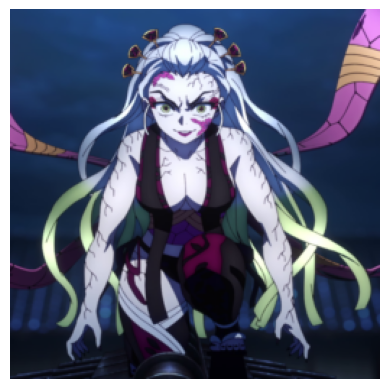

In [8]:
show_image(train_noise_loader)

image tensor:
 tensor([[[0.0706, 0.0706, 0.0745,  ..., 0.1255, 0.1255, 0.1216],
         [0.0667, 0.0667, 0.0745,  ..., 0.1216, 0.1216, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1216, 0.1255, 0.1255],
         ...,
         [0.2078, 0.2078, 0.2078,  ..., 0.5059, 0.4980, 0.5020],
         [0.2118, 0.2118, 0.2078,  ..., 0.4941, 0.5020, 0.4980],
         [0.2118, 0.2157, 0.2078,  ..., 0.3686, 0.4784, 0.4941]],

        [[0.1098, 0.1137, 0.1255,  ..., 0.1490, 0.1490, 0.1451],
         [0.1137, 0.1176, 0.1255,  ..., 0.1451, 0.1412, 0.1412],
         [0.1098, 0.1098, 0.1176,  ..., 0.1451, 0.1451, 0.1490],
         ...,
         [0.2157, 0.2157, 0.2157,  ..., 0.3961, 0.3922, 0.3961],
         [0.2196, 0.2196, 0.2157,  ..., 0.3922, 0.3961, 0.3922],
         [0.2196, 0.2235, 0.2157,  ..., 0.2824, 0.3765, 0.3922]],

        [[0.0588, 0.0588, 0.0627,  ..., 0.1373, 0.1373, 0.1333],
         [0.0549, 0.0588, 0.0627,  ..., 0.1333, 0.1333, 0.1294],
         [0.0549, 0.0549, 0.0588,  ..., 0.1

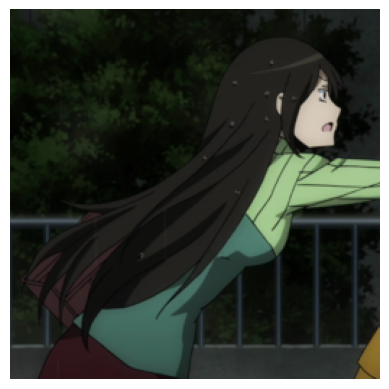

In [9]:
show_image(test_noise_loader)